In [1]:

# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Reshape, Permute
from keras.datasets import mnist
from keras.utils import to_categorical
from scikeras.wrappers import KerasRegressor


(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(f"tain X shape: {train_X.shape}")
print(f"tain y shape: {train_y.shape}")


2024-03-12 11:56:46.842448: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-12 11:56:46.842780: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-12 11:56:46.845097: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-12 11:56:46.873498: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-12 11:56:47.466127: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

tain X shape: (60000, 28, 28)
tain y shape: (60000,)


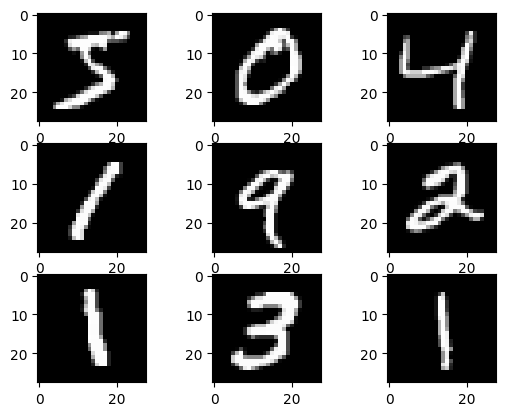

In [2]:
for i in range(9):  
    plt.subplot(330 + 1 + i)
    plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
plt.show()


In [3]:
X_train_digit = train_X.reshape(60000, 784)
X_test_digit = test_X.reshape(10000, 784)
y_train_digit = to_categorical(train_y, num_classes=10)
y_test_digit = to_categorical(test_y, num_classes=10)
print(X_train_digit.shape)
print(X_test_digit.shape)


(60000, 784)
(10000, 784)


In [4]:
import random
print(random.choice(X_train_digit)[:200])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   7 170  13   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  57 244  96   0   0   0   0   0   0   0   0   0   0   0
   0   0]


In [5]:
#Creating base neural network
model = keras.Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.3),
    keras.layers.BatchNormalization(),
    Dense(24, activation='relu'),
    Dropout(0.3),
    keras.layers.BatchNormalization(),
    Dense(24, activation='relu'),
    Dropout(0.3),
    keras.layers.BatchNormalization(),
    Dense(10,activation='sigmoid'),
])
model.summary()

/home/clap/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │         3,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24)             │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 24)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 24)             │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,130 (410.66 KB)

 Trainable params: 104,778 (409.29 KB)

 Non-trainable params: 352 (1.38 KB)

In [6]:
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

In [7]:
model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=30)


Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5409 - loss: 1.4206
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8406 - loss: 0.5507
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8866 - loss: 0.4105
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9010 - loss: 0.3532
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9137 - loss: 0.3174
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9175 - loss: 0.3056
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9250 - loss: 0.2805
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9283 - loss: 0.2707
Epoch 9/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9304 - loss: 0.2593
Epoch 10/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9351 - loss: 0.2478
Epoch 11/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9322 - loss: 0.2433
Epoch 12/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [9]:

#Evaluating digit MNIST test accuracy
test_loss_digit, test_acc_digit = model.evaluate(X_test_digit, y_test_digit)
print("Mnist test accuracy", round(test_acc_digit, 4))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.9722 - loss: 0.1104
Mnist test accuracy 0.9765


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step


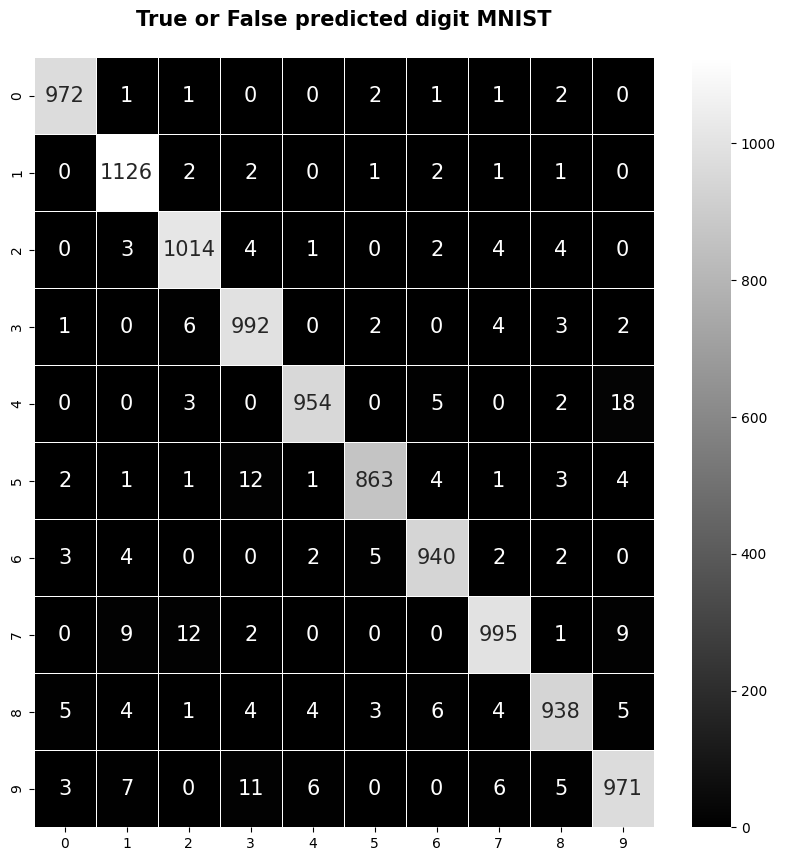

In [12]:

#Predicting the labels-DIGIT
y_predict = model.predict(X_test_digit)
y_predict=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)


#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predict)
plt.style.use('seaborn-v0_8-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

In [13]:

#Function for the base neural network
def create_model(layers, activation):
    model = Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train_digit.shape[1]))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
            model.add(Dropout(0.3))
            
    model.add(Dense(units = 10, kernel_initializer= 'glorot_uniform', activation = 'softmax')) 
    
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
    return model

In [14]:
from scikeras.wrappers import KerasClassifier, KerasRegressor

#Using Keras classifier to apply the function
model3 = KerasClassifier(build_fn=create_model, verbose=0)

#Tuning the layers, activation function and batch sizes
layers = [(20,), (40, 20), (45, 30, 15)]
activations = ['sigmoid', 'relu','softmax']
param_grid = dict(layers=layers, activation=activations, batch_size = [128, 256], epochs=[30])

#Using GridSearchCV to fit the param dictionary
grid = GridSearchCV(estimator=model3, param_grid=param_grid,cv=5)
#Fitting the params with the training data to figure out the best params and accuracy score
grid_result = grid.fit(X_train_digit, y_train_digit)

print(grid_result.best_score_,grid_result.best_params_)

ValueError: Invalid parameter activation for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(activation=sigmoid)`
Check the list of available parameters with `estimator.get_params().keys()`